In [52]:

import pandas as pd
import numpy as np
from pathlib import Path
file_path = Path('Superstore.csv')
df = pd.read_csv(file_path, encoding='latin1')
df.shape
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [53]:

df.columns.tolist()


['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [54]:

df_info = {}
df_info['shape'] = df.shape
df_info['head'] = df.head(5)
df_info['dtypes'] = df.dtypes
df_info['describe_num'] = df.describe(include=[np.number]).T
df_info['missing'] = df.isnull().sum()
df_info


{'shape': (9994, 21),
 'head':    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
 0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
 1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
 2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
 3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
 4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
 
      Customer Name    Segment        Country             City  ...  \
 0      Claire Gute   Consumer  United States        Henderson  ...   
 1      Claire Gute   Consumer  United States        Henderson  ...   
 2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
 3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 
   Postal Code  Region       Product ID         

In [55]:

cols_expected = ['Order ID','Order Date','Ship Date','Ship Mode','Customer ID','Segment','City','State','Region','Product ID','Category','Sub-Category','Product Name','Sales','Quantity','Discount','Profit','Postal Code']
available = [c for c in cols_expected if c in df.columns]
available, df.shape


(['Order ID',
  'Order Date',
  'Ship Date',
  'Ship Mode',
  'Customer ID',
  'Segment',
  'City',
  'State',
  'Region',
  'Product ID',
  'Category',
  'Sub-Category',
  'Product Name',
  'Sales',
  'Quantity',
  'Discount',
  'Profit',
  'Postal Code'],
 (9994, 21))

In [56]:

report = pd.DataFrame({
    'column': df.columns,
    'dtype': df.dtypes.astype(str),
    'non_null_count': df.notnull().sum().values,
    'null_count': df.isnull().sum().values,
    'unique': [df[c].nunique(dropna=False) for c in df.columns]
})
report


,column,dtype,non_null_count,null_count,unique
Row ID,Row ID,int64,9994,0,9994
Order ID,Order ID,object,9994,0,5009
Order Date,Order Date,object,9994,0,1237
Ship Date,Ship Date,object,9994,0,1334
Ship Mode,Ship Mode,object,9994,0,4
Customer ID,Customer ID,object,9994,0,793
Customer Name,Customer Name,object,9994,0,793
Segment,Segment,object,9994,0,3
Country,Country,object,9994,0,1
City,City,object,9994,0,531


In [57]:

import matplotlib.pyplot as plt
import numpy as np
missing = df.isnull().sum()
missing = missing[missing>0].sort_values(ascending=False)
missing


Series([], dtype: int64)

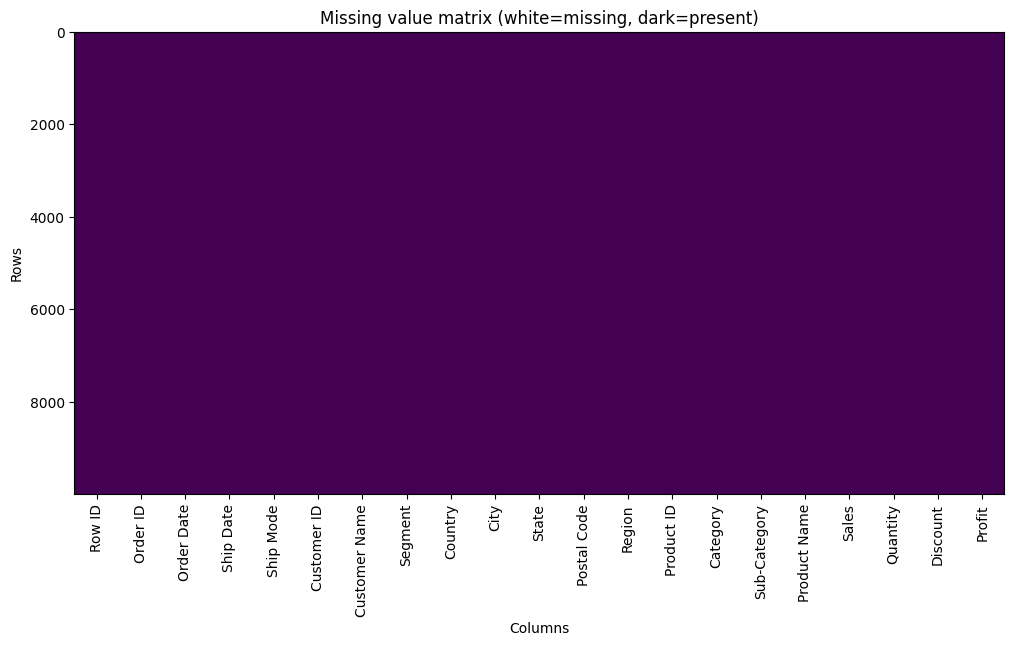

In [58]:

if len(df.columns)>0:
    plt.figure(figsize=(12,6))
    plt.imshow(df.isnull(), aspect='auto', interpolation='nearest')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.title('Missing value matrix (white=missing, dark=present)')
    plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=90)
    plt.show()


In [59]:

missing_frac = (df.isnull().sum()/len(df)).sort_values(ascending=False)
treatment = []
for col, frac in missing_frac.items():
    if frac==0:
        treatment.append((col,'no_missing','keep'))
    elif frac>0.5:
        treatment.append((col,f'{frac:.2f}','high_missing_consider_drop'))
    else:
        if df[col].dtype in [np.float64, np.int64]:
            treatment.append((col,f'{frac:.2f}','impute_median'))
        else:
            treatment.append((col,f'{frac:.2f}','impute_mode'))
treatment_df = pd.DataFrame(treatment, columns=['column','missing_fraction','suggested_treatment'])
treatment_df


,column,missing_fraction,suggested_treatment
0,Row ID,no_missing,keep
1,Order ID,no_missing,keep
2,Order Date,no_missing,keep
3,Ship Date,no_missing,keep
4,Ship Mode,no_missing,keep
5,Customer ID,no_missing,keep
6,Customer Name,no_missing,keep
7,Segment,no_missing,keep
8,Country,no_missing,keep
9,City,no_missing,keep


In [60]:

df_imputed = df.copy()
for col, frac, method in treatment_df.values:
    if method=='impute_median':
        med = df_imputed[col].median()
        df_imputed[col] = df_imputed[col].fillna(med)
    elif method=='impute_mode':
        try:
            mode = df_imputed[col].mode(dropna=True)[0]
            df_imputed[col] = df_imputed[col].fillna(mode)
        except Exception:
            df_imputed[col] = df_imputed[col].fillna('Missing')
    elif method=='high_missing_consider_drop':
        pass
df_imputed.isnull().sum().sort_values(ascending=False).head(20)


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
dtype: int64

In [61]:

num_cols = df_imputed.select_dtypes(include=[np.number]).columns.tolist()
num_cols_stats = df_imputed[num_cols].describe().T
from scipy.stats import skew, kurtosis
stats_extra = []
for c in num_cols:
    stats_extra.append({
        'column':c,
        'mean':df_imputed[c].mean(),
        'median':df_imputed[c].median(),
        'mode': (df_imputed[c].mode().iloc[0] if not df_imputed[c].mode().empty else np.nan),
        'std': df_imputed[c].std(),
        'var': df_imputed[c].var(),
        'min': df_imputed[c].min(),
        'max': df_imputed[c].max(),
        'range': df_imputed[c].max()-df_imputed[c].min(),
        'iqr': df_imputed[c].quantile(0.75)-df_imputed[c].quantile(0.25),
        'skewness': skew(df_imputed[c].dropna()),
        'kurtosis': kurtosis(df_imputed[c].dropna())
    })
pd.DataFrame(stats_extra).set_index('column')


,mean,median,mode,std,var,min,max,range,iqr,skewness,kurtosis
column,,,,,,,,,,,
Row ID,4997.500000,4997.5000,1.00,2885.163629,8.324169e+06,1.000,9994.000,9993.000,4996.50000,0.000000,-1.200000
Postal Code,55190.379428,56430.5000,10035.00,32063.693350,1.028080e+09,1040.000,99301.000,98261.000,66785.00000,-0.128506,-1.492874
Sales,229.858001,54.4900,12.96,623.245101,3.884345e+05,0.444,22638.480,22638.036,192.66000,12.970805,305.158427
Quantity,3.789574,3.0000,3.00,2.225110,4.951113e+00,1.000,14.000,13.000,3.00000,1.278353,1.990293
Discount,0.156203,0.2000,0.00,0.206452,4.262242e-02,0.000,0.800,0.800,0.20000,1.684042,2.407740
Profit,28.656896,8.6665,0.00,234.260108,5.487780e+04,-6599.978,8399.976,14999.954,27.63525,7.560297,396.989229


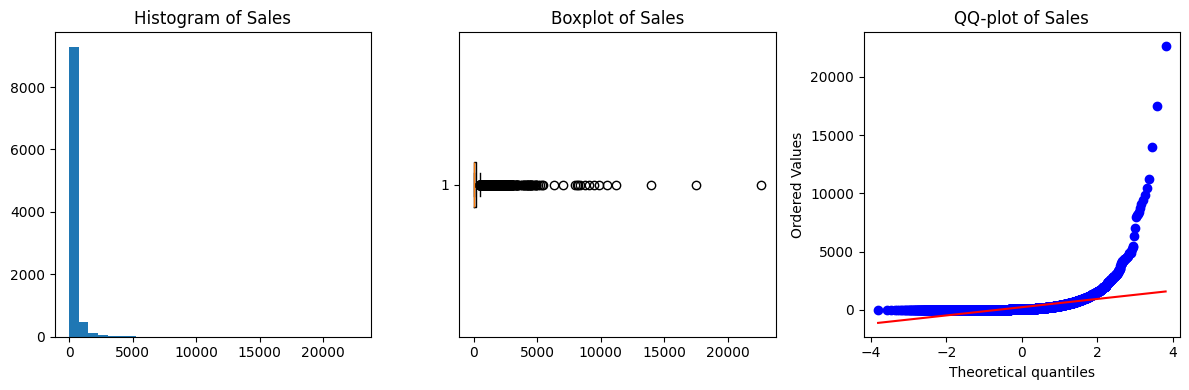

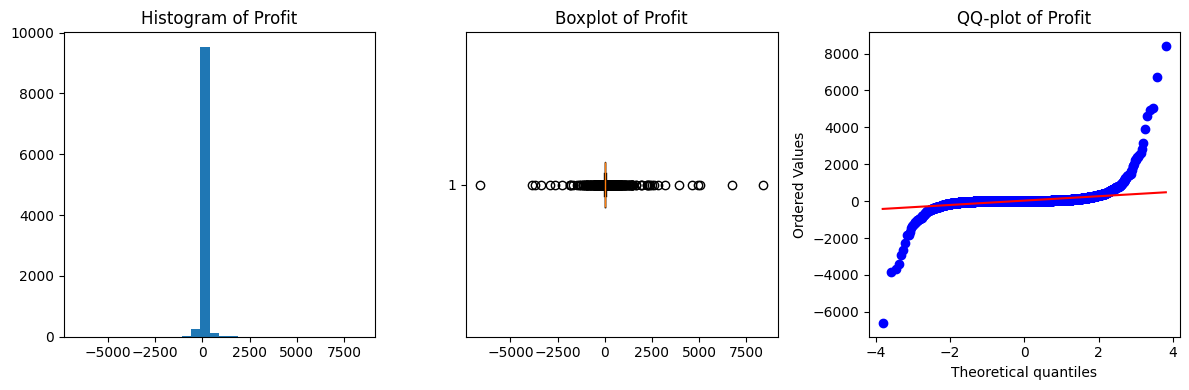

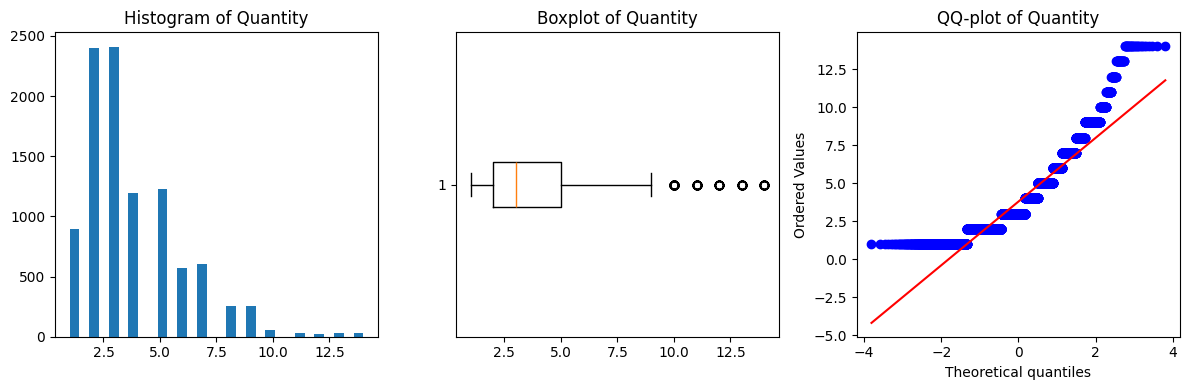

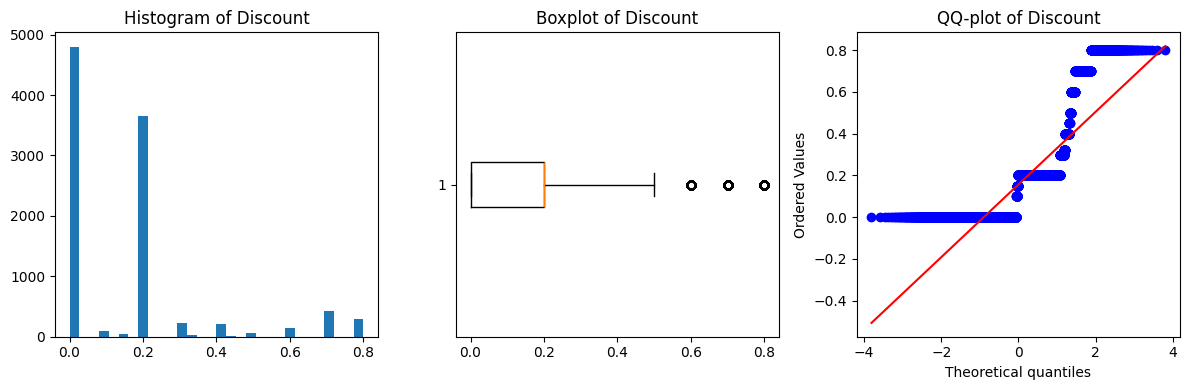

In [62]:

import matplotlib.pyplot as plt
from scipy import stats
plot_cols = ['Sales','Profit','Quantity','Discount']
for col in plot_cols:
    if col in df_imputed.columns:
        plt.figure(figsize=(12,4))
        plt.subplot(1,3,1)
        plt.hist(df_imputed[col].dropna(), bins=30)
        plt.title(f'Histogram of {col}')
        plt.subplot(1,3,2)
        plt.boxplot(df_imputed[col].dropna(), vert=False)
        plt.title(f'Boxplot of {col}')
        plt.subplot(1,3,3)
        stats.probplot(df_imputed[col].dropna(), dist='norm', plot=plt)
        plt.title(f'QQ-plot of {col}')
        plt.tight_layout()
        plt.show()


In [63]:

from scipy import stats
outlier_summary = []
for c in ['Sales','Profit','Quantity']:
    if c in df_imputed.columns:
        series = df_imputed[c].dropna()
        zscores = np.abs(stats.zscore(series))
        z_outliers = (zscores>3).sum()
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3-q1
        iqr_outliers = ((series < (q1-1.5*iqr)) | (series > (q3+1.5*iqr))).sum()
        outlier_summary.append({'column':c,'z_outliers':int(z_outliers),'iqr_outliers':int(iqr_outliers)})
outlier_summary_df = pd.DataFrame(outlier_summary)
outlier_summary_df


,column,z_outliers,iqr_outliers
0,Sales,127,1167
1,Profit,107,1881
2,Quantity,113,170


In [64]:

df_winsor = df_imputed.copy()
for c in ['Sales','Profit','Quantity']:
    if c in df_winsor.columns:
        lower = df_winsor[c].quantile(0.01)
        upper = df_winsor[c].quantile(0.99)
        df_winsor[c] = np.where(df_winsor[c]<lower, lower, df_winsor[c])
        df_winsor[c] = np.where(df_winsor[c]>upper, upper, df_winsor[c])
for c in ['Sales','Profit','Quantity']:
    if c in df_imputed.columns:
        display(pd.DataFrame({
            'before_mean': [df_imputed[c].mean()],
            'after_mean': [df_winsor[c].mean()],
            'before_std': [df_imputed[c].std()],
            'after_std': [df_winsor[c].std()]
        }, index=[c]))


,before_mean,after_mean,before_std,after_std
Sales,229.858001,209.365508,623.245101,394.795901


,before_mean,after_mean,before_std,after_std
Profit,28.656896,26.307032,234.260108,97.564856


,before_mean,after_mean,before_std,after_std
Quantity,3.789574,3.773164,2.22511,2.162163


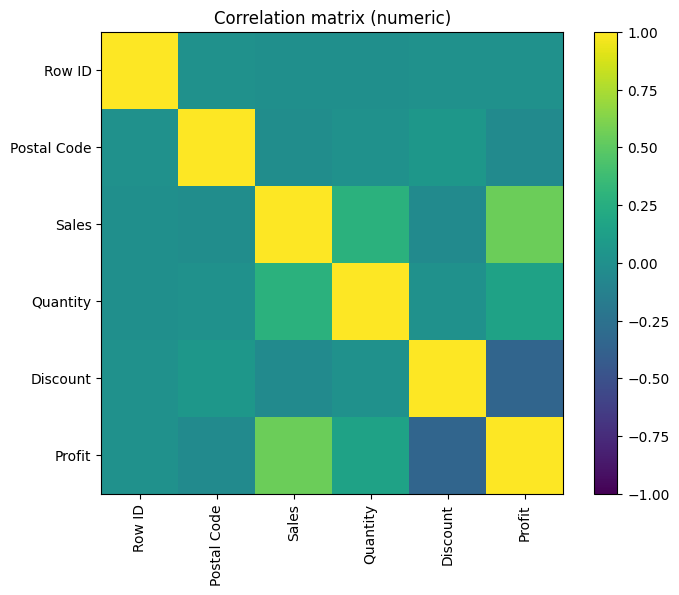

In [65]:

import matplotlib.pyplot as plt
num = df_winsor.select_dtypes(include=[np.number])
corr = num.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation matrix (numeric)')
plt.show()


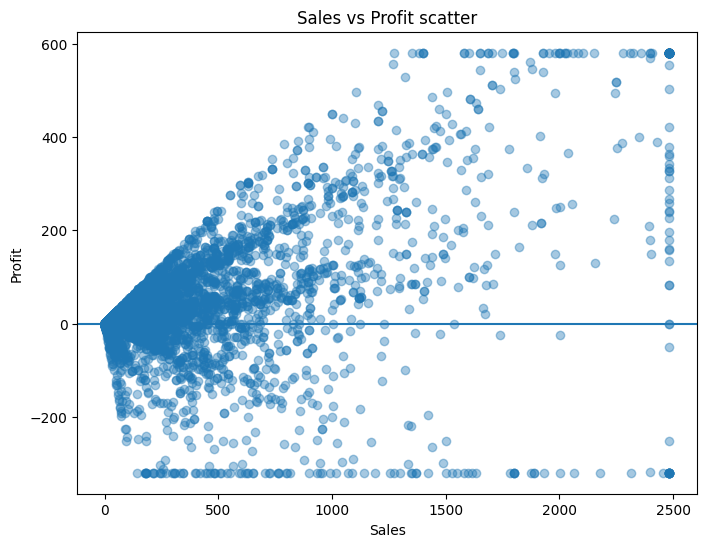

In [66]:

if 'Sales' in df_winsor.columns and 'Profit' in df_winsor.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(df_winsor['Sales'], df_winsor['Profit'], alpha=0.4)
    plt.xlabel('Sales')
    plt.ylabel('Profit')
    plt.title('Sales vs Profit scatter')
    plt.axhline(0)
    plt.show()


,Sales,Profit,orders
Region,,,
West,683854.5691,99978.630755,1611
East,609208.8074,78597.514055,1401
Central,452961.0336,34525.504703,1175
South,346374.4792,49810.830687,822


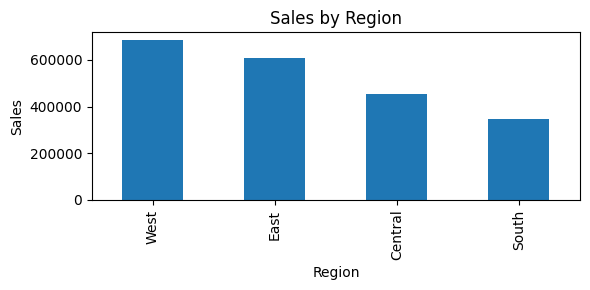

,Sales,Profit,orders
Category,,,
Furniture,724401.5081,26702.686771,1764
Technology,697855.7006,116302.132379,1544
Office Supplies,670141.6806,119907.661050,3742


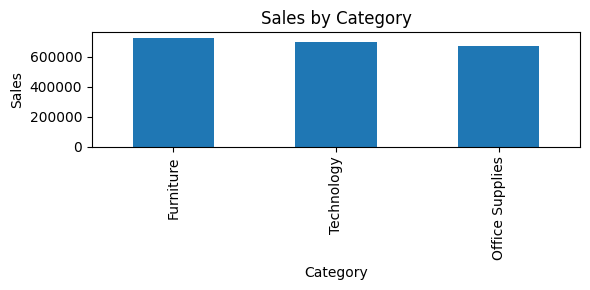

,Sales,Profit,orders
Sub-Category,,,
Chairs,322216.5552,26330.066586,576
Phones,322009.3088,43213.246415,814
Storage,223281.1072,21079.947687,777
Tables,202321.9116,-11153.361761,307
Binders,170389.1910,25603.370595,1316
Accessories,166517.2526,40826.239402,718
Machines,118583.2176,8552.425858,112
Bookcases,108156.9313,-1767.309242,224
Appliances,107333.3108,19175.311974,451


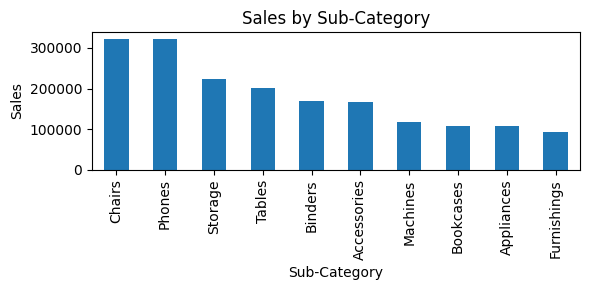

,Sales,Profit,orders
Ship Mode,,,
Standard Class,1.231764e+06,149890.149174,2994
Second Class,4.213648e+05,55434.673359,964
First Class,3.192170e+05,41554.744152,787
Same Day,1.200533e+05,16032.913515,264


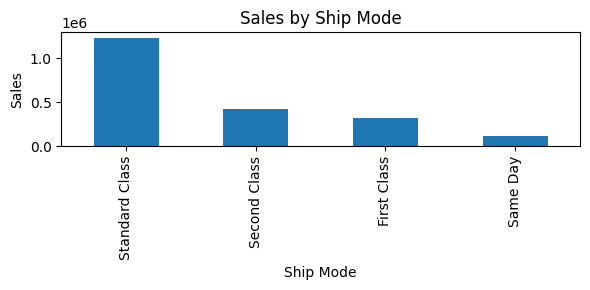

,Sales,Profit,orders
Segment,,,
Consumer,1.056818e+06,125795.702598,2586
Corporate,6.509015e+05,82136.239211,1514
Home Office,3.846790e+05,54980.538391,909


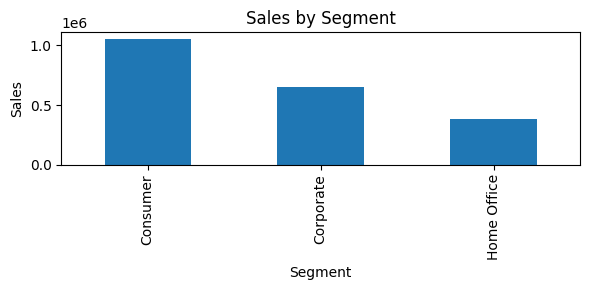

In [67]:

cat_cols = ['Region','Category','Sub-Category','Ship Mode','Segment']
for c in cat_cols:
    if c in df_winsor.columns:
        agg = df_winsor.groupby(c).agg({'Sales':'sum','Profit':'sum','Order ID':'nunique'}).rename(columns={'Order ID':'orders'}).sort_values('Sales', ascending=False).head(10)
        display(pd.DataFrame(agg))
        plt.figure(figsize=(6,3))
        agg['Sales'].plot(kind='bar')
        plt.title(f'Sales by {c}')
        plt.ylabel('Sales')
        plt.tight_layout()
        plt.show()


In [68]:

total_sales = df_winsor['Sales'].sum() if 'Sales' in df_winsor.columns else np.nan
total_profit = df_winsor['Profit'].sum() if 'Profit' in df_winsor.columns else np.nan
profit_margin = total_profit/total_sales if total_sales and total_sales!=0 else np.nan
aov = df_winsor.groupby('Order ID')['Sales'].sum().mean() if 'Order ID' in df_winsor.columns and 'Sales' in df_winsor.columns else np.nan
neg_profit_pct = (df_winsor['Profit']<0).mean()*100 if 'Profit' in df_winsor.columns else np.nan
pd.DataFrame({
    'total_sales':[total_sales],
    'total_profit':[total_profit],
    'profit_margin':[profit_margin],
    'average_order_value':[aov],
    'percent_negative_profit_orders':[neg_profit_pct]
})


,total_sales,total_profit,profit_margin,average_order_value,percent_negative_profit_orders
0,2.092399e+06,262912.4802,0.125651,417.727868,18.721233
